In [1]:
import pandas as pd
df_all=pd.read_csv('C:/diabetic_data_processed_withweight.csv',';')
print(type(df_all))
to_del = ['admission_source_id','encounter_id', 'patient_nbr','medical_specialty','payer_code','index','admission_type_id','discharge_disposition_id',
          'nateglinide','chlorpropamide','acetohexamide','tolbutamide','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']        
print (to_del)
#Filter_selected cols
filtered_cols = [c for c in df_all.columns if (c not in to_del) ]#and ('ENF' not in c)
df_2 = df_all[filtered_cols]
print ("df_2",df_2.shape)

<class 'pandas.core.frame.DataFrame'>
['admission_source_id', 'encounter_id', 'patient_nbr', 'medical_specialty', 'payer_code', 'index', 'admission_type_id', 'discharge_disposition_id', 'nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
df_2 (101766, 28)


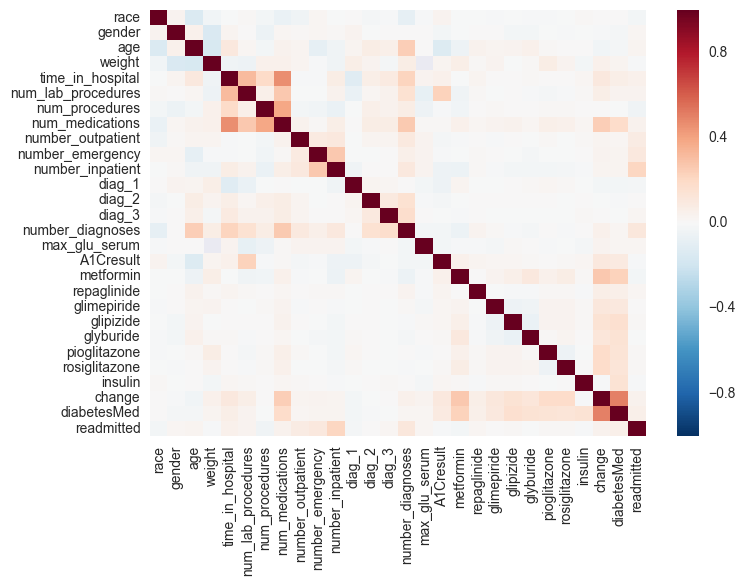

In [2]:
import seaborn as sns
corr = df_2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.show()

In [34]:
from sklearn.model_selection import train_test_split
import numpy as np
df_3 = df_2.fillna(value=np.mean(df_2,axis=0),inplace=False,axis=0).values
print ("df_3",df_3.shape)
print(df_2.columns)
X=df_3[:,0:-1]
y=df_3[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train=np.where(y_train > 0, 1, y_train)
y_test=np.where(y_test > 0, 1, y_test)
print(set(y_train))
print(set(y_test))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

df_3 (101766, 28)
Index(['race', 'gender', 'age', 'weight', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed',
       'readmitted'],
      dtype='object')
{0.0, 1.0}
{0.0, 1.0}
(81412, 27)
(20354, 27)
(81412,)
(20354,)


In [35]:
from sklearn.preprocessing import StandardScaler
# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_test = scaler.transform(X_test)

In [36]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential
# Import `Dense` from `keras.layers`
from keras.layers import Dense
# Initialize the constructor
model = Sequential()
# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(27,)))
# Add one hidden layer 
model.add(Dense(8, activation='relu'))
# Add an output layer 
model.add(Dense(1, activation='sigmoid'))
# Model output shape
model.output_shape
# Model summary
model.summary()
# Model config
model.get_config()
# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                336       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.14748773,  0.38742819,  0.07274354, -0.08553007, -0.01337981,
          0.11699924,  0.13521484,  0.13405141,  0.18588367, -0.1823097 ,
          0.12507769, -0.12393034],
        [-0.17935181,  0.33179727, -0.32142386,  0.07769722,  0.30988929,
         -0.32798433, -0.02747625,  0.09574392,  0.21933839, -0.0706138 ,
          0.23734662, -0.25186986],
        [-0.33688366,  0.35425398,  0.166742  , -0.23217121, -0.23783852,
          0.01868337, -0.20006174, -0.14413977, -0.23956342, -0.13160422,
         -0.386116  ,  0.33926621],
        [ 0.22121492,  0.13723382, -0.35409003, -0.08939591, -0.33492357,
         -0.26329577,  0.01240352,  0.17812386,  0.37552282,  0.1513603 ,
         -0.06238931,  0.36111507],
        [ 0.18070486,  0.1472663 , -0.07079402, -0.00888482,  0.15291843,
          0.0501599 ,  0.27910998,  0.2298781 ,  0.21909174,  0.18641147,
         -0.11822346,  0.31734237],
        [-0.19387691, -0.3101733 ,  0.28941885, -0.28847817,  0.11122563,
      

In [37]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])            
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
81412/81412 [==============================] - 77s - loss: 0.6533 - acc: 0.6151    
Epoch 2/20
81412/81412 [==============================] - 76s - loss: 0.6481 - acc: 0.6235    
Epoch 3/20
81412/81412 [==============================] - 76s - loss: 0.6471 - acc: 0.6241    
Epoch 4/20
81412/81412 [==============================] - 77s - loss: 0.6459 - acc: 0.6241    
Epoch 5/20
81412/81412 [==============================] - 77s - loss: 0.6459 - acc: 0.6259    
Epoch 6/20
81412/81412 [==============================] - 77s - loss: 0.6455 - acc: 0.6252    
Epoch 7/20
81412/81412 [==============================] - 76s - loss: 0.6451 - acc: 0.6271    
Epoch 8/20
81412/81412 [==============================] - 77s - loss: 0.6448 - acc: 0.6269    
Epoch 9/20
81412/81412 [==============================] - 77s - loss: 0.6450 - acc: 0.6265    
Epoch 10/20
81412/81412 [==============================] - 78s - loss: 0.6447 - acc: 0.6269    
Epoch 11/20
81412/81412 [========================

In [47]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

# Confusion matrix
print(confusion_matrix(y_test, y_pred.round()))
       
# Precision 
print("Precision: ",precision_score(y_test, y_pred.round()))

# Recall
print("Recall: ",recall_score(y_test, y_pred.round()))

# F1 score
print("F1score: ", f1_score(y_test,y_pred.round()))

# Cohen's kappa
print("Cohen's kappa",cohen_kappa_score(y_test, y_pred.round()))


17408/20354 [========================>.....] - ETA: 0s[0.64584224897856746, 0.62533163014640858]
[[7895 3148]
 [4478 4833]]
Precision:  0.60556321263
Recall:  0.519063473311
F1score:  0.558986814712
Cohen's kappa 0.236646870417
